In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import sklearn

from datetime import datetime, timedelta
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last few rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size) #cross validation 
    #X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, ran-dom_state=chosen_random_state)


    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;

In [3]:
df = pd.read_csv('GOOG_ALL.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3781,2019-08-27,1180.530029,1182.400024,1161.449951,1167.839966,1167.839966,1077200
3782,2019-08-28,1161.709961,1176.420044,1157.300049,1171.020020,1171.020020,802000
3783,2019-08-29,1181.119995,1196.060059,1181.119995,1192.849976,1192.849976,1088400
3784,2019-08-30,1198.500000,1198.500000,1183.802979,1188.099976,1188.099976,1129800
3785,2019-09-03,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900


In [4]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [5]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
3781,1167.839966,1077200,1.793916,-1.074946
3782,1171.020020,802000,1.632764,0.801410
3783,1192.849976,1088400,1.252468,0.993124
3784,1188.099976,1129800,1.237019,-0.867753
3785,1168.390015,1479900,2.027582,-0.734052


In [6]:
forecast_col = 'Adj Close'#choosing which column to forecast
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
#forecast_out = 5 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(dfreg,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

# Linear regression
learner_linear = linear_model.LinearRegression(); #initializing linear regression model
learner_linear.fit(X_train,Y_train); #training the linear regression model

score_linear=learner_linear.score(X_test,Y_test);#testing the linear regression model
forecast_linear= learner_linear.predict(X_lately); #set that will contain the forecasted data

# Quadratic Regression 2

learner_Quadratic2 = make_pipeline(PolynomialFeatures(2), Ridge()); #initializing Quadratic regression 2 model
learner_Quadratic2.fit(X_train,Y_train); #training the Quadratic regression 2 model

score_Quadratic2=learner_Quadratic2.score(X_test,Y_test);#testing the Quadratic regression 2 model
forecast_Quadratic2= learner_Quadratic2.predict(X_lately); #set that will contain the forecasted data

# Quadratic Regression 3

learner_Quadratic3 = make_pipeline(PolynomialFeatures(3), Ridge()); #initializing Quadratic regression 3 model
learner_Quadratic3.fit(X_train,Y_train); #training the Quadratic regression 3 model

score_Quadratic3=learner_Quadratic3.score(X_test,Y_test);#testing the Quadratic regression 3 model
forecast_Quadratic3= learner_Quadratic3.predict(X_lately); #set that will contain the forecasted data

# KNN Regression

learner_KNN = linear_model.LinearRegression(); #initializing KNN regression model
learner_KNN.fit(X_train,Y_train); #training the KNN regression model

score_KNN=learner_KNN.score(X_test,Y_test);#testing the KNN regression model
forecast_KNN= learner_KNN.predict(X_lately); #set that will contain the forecasted data

response={};#creating json object

response['test_score_linear']=score_linear; 
#response['forecast_set_linear']=forecast_linear;

response['test_score_Quadratic2']=score_Quadratic2; 
#response['forecast_set_Quadratic2']=forecast_Quadratic2;

response['test_score_Quadratic3']=score_Quadratic3; 
#response['forecast_set_Quadratic3']=forecast_Quadratic3;

response['test_score_KNN']=score_KNN; 
#response['forecast_set_KNN']=forecast_KNN;

print(response);


{'test_score_KNN': 0.97928458302295085, 'test_score_linear': 0.97928458302295085, 'test_score_Quadratic3': 0.98104968737423948, 'test_score_Quadratic2': 0.97938563921526689}


In [7]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
3781,1167.839966,1077200,1.793916,-1.074946
3782,1171.020020,802000,1.632764,0.801410
3783,1192.849976,1088400,1.252468,0.993124
3784,1188.099976,1129800,1.237019,-0.867753
3785,1168.390015,1479900,2.027582,-0.734052


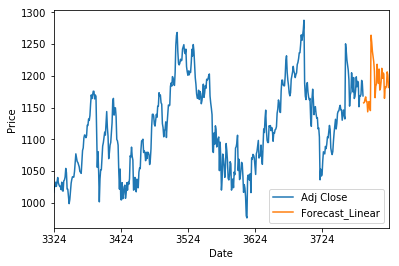

In [8]:
# Plot Linear Prediction
import matplotlib.pyplot as plt
last_date = df.iloc[-1].Date
last_unix = datetime.strptime(last_date, '%Y-%m-%d')

#print(date.today())
#print(date.today()+datetime.timedelta(days=1))
#print(last_unix+timedelta(days=1))
next_unix = last_unix + timedelta(days=1)

dfreg['Forecast_Linear'] = np.nan
for i in forecast_linear:
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast_Linear'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

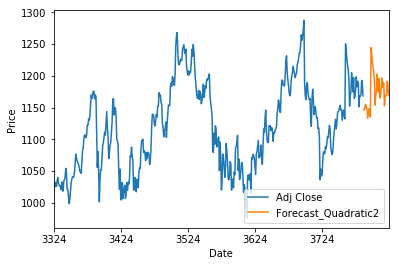

In [9]:
# Plot Quadratic2 Prediction
import matplotlib.pyplot as plt
last_date = df.iloc[-1].Date
last_unix = datetime.strptime(last_date, '%Y-%m-%d')

next_unix = last_unix + timedelta(days=1)

dfreg['Forecast_Quadratic2'] = np.nan
for i in forecast_Quadratic2:
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast_Quadratic2'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

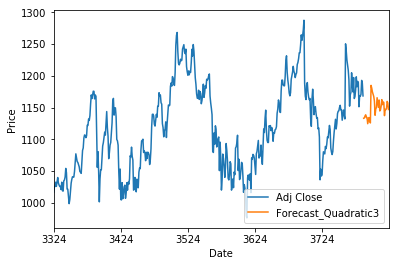

In [10]:
# Plot Quadratic3 Prediction
import matplotlib.pyplot as plt
last_date = df.iloc[-1].Date
last_unix = datetime.strptime(last_date, '%Y-%m-%d')

next_unix = last_unix + timedelta(days=1)

dfreg['Forecast_Quadratic3'] = np.nan
for i in forecast_Quadratic3:
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast_Quadratic3'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

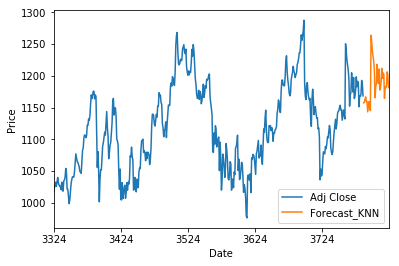

In [11]:
# Plot KNN Prediction
import matplotlib.pyplot as plt
last_date = df.iloc[-1].Date
last_unix = datetime.strptime(last_date, '%Y-%m-%d')

next_unix = last_unix + timedelta(days=1)

dfreg['Forecast_KNN'] = np.nan
for i in forecast_KNN:
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast_KNN'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()